In [1]:
import time
start_time = time.time()
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
dataset=pd.read_csv("pakben.csv")
dataset=dataset.drop(['hash'],axis=1)
dataset['classification'] = dataset['classification'].replace(['malware','benign',],[1,0])
dataset.head()

,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,0,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
1,1,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
2,2,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
3,3,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0
4,4,1,0,0,3069378560,14274,0,0,0,13173,...,0,0,120,0,3204448256,380690,4,0,0,0


In [3]:
x = dataset.drop(columns=['classification']).values
y = dataset["classification"].values
x = StandardScaler().fit_transform(x)

In [4]:
transformer = FactorAnalysis(n_components=5, random_state=0)
X_transformed = transformer.fit_transform(x)
fa = pd.DataFrame(data = X_transformed
             , columns = ['component 1', 'component 2', 'component 3', 'component 4', 'component 5'])
finalfa = pd.concat([fa, dataset[['classification']]], axis = 1)

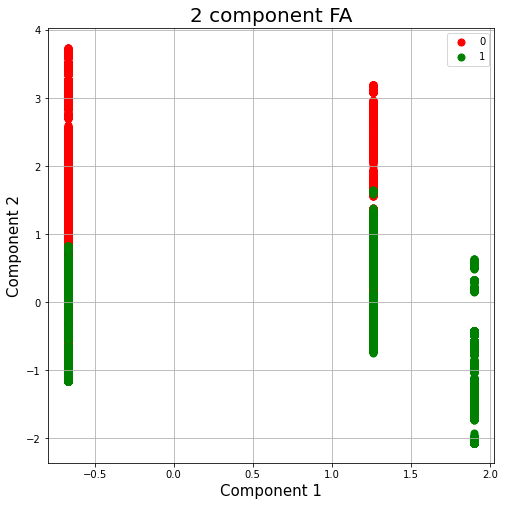

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('2 component FA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for classification, color in zip(targets,colors):
    indicesToKeep = finalfa['classification'] == classification
    ax.scatter(finalfa.loc[indicesToKeep, 'component 1']
               , finalfa.loc[indicesToKeep, 'component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.savefig("Dimensional Reduction using FA.png", dpi=150)

In [6]:
print("Waktu proses reduksi dimensi : %s seconds" % (time.time() - start_time))

Waktu proses reduksi dimensi : 15.766765117645264 seconds


In [7]:
finalfa

,component 1,component 2,component 3,component 4,component 5,classification
0,-0.667258,-0.279283,0.661799,-1.167394,0.010119,1
1,-0.667258,-0.279281,0.661825,-1.167407,0.010174,1
2,-0.667258,-0.279278,0.661851,-1.167419,0.010229,1
3,-0.667258,-0.279275,0.661877,-1.167431,0.010284,1
4,-0.667258,-0.279273,0.661903,-1.167444,0.010339,1
...,...,...,...,...,...,...
99995,-0.667258,-1.108468,-0.538861,0.248069,-0.294648,1
99996,-0.667258,-1.108465,-0.538835,0.248057,-0.294593,1
99997,-0.667258,-1.108463,-0.538809,0.248044,-0.294538,1
99998,-0.667258,-1.108460,-0.538783,0.248032,-0.294483,1


In [8]:
x=finalfa.iloc[:,0:5].values
y=finalfa["classification"].values

In [9]:
x

array([[-0.66725778, -0.27928332,  0.66179903, -1.16739427,  0.0101193 ],
       [-0.66725778, -0.27928063,  0.66182498, -1.16740665,  0.01017418],
       [-0.66725778, -0.27927794,  0.66185093, -1.16741904,  0.01022906],
       ...,
       [-0.66725778, -1.10846265, -0.53880899,  0.24804447, -0.29453778],
       [-0.66725778, -1.10845997, -0.53878304,  0.24803208, -0.2944829 ],
       [-0.66725778, -1.10845728, -0.53875709,  0.2480197 , -0.29442802]])

In [10]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5,stratify=y)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Accuracy of logistic regression classifier on test set: 0.89907

[[13414  1586]
 [ 1442 13558]]

              precision    recall  f1-score   support

           0       0.90      0.89      0.90     15000
           1       0.90      0.90      0.90     15000

    accuracy                           0.90     30000
   macro avg       0.90      0.90      0.90     30000
weighted avg       0.90      0.90      0.90     30000



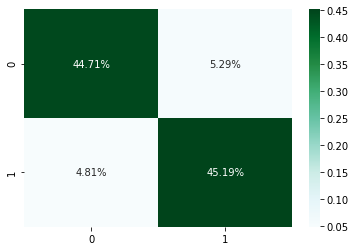

In [12]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))
print("")
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%',cmap='BuGn')
print("")
print(classification_report(y_test, y_pred))

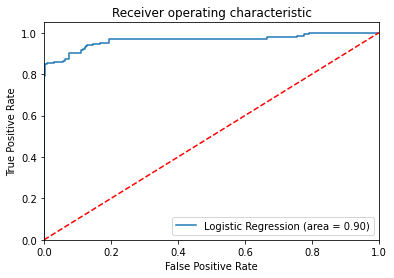

<Figure size 432x288 with 0 Axes>

In [13]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
plt.savefig("ROC Curve using FA.png", dpi=150)